# Model 3 - Recumbent Fold

A recumbent (overturned) fold. We start by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

Creating the model by importing the input data and displaying it:

In [2]:
path_to_data = os.pardir+"/data/input_data/jan_models/"

geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=[50,50,50], 
                        path_o = path_to_data + "model3_orientations.csv",
                        path_i = path_to_data + "model3_surface_points.csv") 

Active grids: ['regular']


In [3]:
geo_data.get_data()

X      Y    Z     X_r     Y_r     Z_r surface  \
surface_points 0      0    200  800  0.4826  0.2601  0.5151   rock1   
               1      0    200  200  0.4826  0.2601  0.4851   rock1   
               2    100    200  790  0.4876  0.2601  0.5146   rock1   
               3    100    200  210  0.4876  0.2601  0.4856   rock1   
               4    200    200  780  0.4926  0.2601  0.5141   rock1   
               5    200    200  220  0.4926  0.2601  0.4861   rock1   
               6    300    200  770  0.4976  0.2601  0.5136   rock1   
               7    300    200  230  0.4976  0.2601  0.4866   rock1   
               8    400    200  760  0.5026  0.2601  0.5131   rock1   
               9    400    200  240  0.5026  0.2601  0.4871   rock1   
               10   700    200  500  0.5176  0.2601  0.5001   rock1   
               11     0      0  800  0.4826  0.2501  0.5151   rock1   
               12     0      0  200  0.4826  0.2501  0.4851   rock1   
               13   100      0  790  0.4876  0.2501  0.5146   rock1   
               14   100      0  210  0.4876  0.2501  0.4856   rock1   
               15   200      0  780  0.4926  0.2501  0.5141   rock1   
               16   200      0  220  0.4926  0.2501  0.4861   rock1   
               17   300      0  770  0.4976  0.2501  0.5136   rock1   
               18   300      0  230  0.4976  0.2501  0.4866   rock1   
               19   400      0  760  0.5026  0.2501  0.5131   rock1   
               20   400      0  240  0.5026  0.2501  0.4871   rock1   
               21   700      0  500  0.5176  0.2501  0.5001   rock1   
               22     0    500  800  0.4826  0.2751  0.5151   rock1   
               23     0    500  200  0.4826  0.2751  0.4851   rock1   
               24   100    500  790  0.4876  0.2751  0.5146   rock1   
               25   100    500  210  0.4876  0.2751  0.4856   rock1   
               26   200    500  780  0.4926  0.2751  0.5141   rock1   
               27   200    500  220  0.4926  0.2751  0.4861   rock1   
               28   300    500  770  0.4976  0.2751  0.5136   rock1   
               29   300    500  230  0.4976  0.2751  0.4866   rock1   
...                 ...    ...  ...     ...     ...     ...     ...   
               77   100    500  590  0.4876  0.2751  0.5046   rock2   
               78   100    500  410  0.4876  0.2751  0.4956   rock2   
               79   200    500  580  0.4926  0.2751  0.5041   rock2   
               80   200    500  420  0.4926  0.2751  0.4961   rock2   
               81   300    500  570  0.4976  0.2751  0.5036   rock2   
               82   300    500  430  0.4976  0.2751  0.4966   rock2   
               83   400    500  560  0.5026  0.2751  0.5031   rock2   
               84   400    500  440  0.5026  0.2751  0.4971   rock2   
               85     0   1000  600  0.4826  0.3001  0.5051   rock2   
               86     0   1000  400  0.4826  0.3001  0.4951   rock2   
               87   100   1000  590  0.4876  0.3001  0.5046   rock2   
               88   100   1000  410  0.4876  0.3001  0.4956   rock2   
               89   200  10000  580  0.4926  0.7501  0.5041   rock2   
               90   200   1000  420  0.4926  0.3001  0.4961   rock2   
               91   300   1000  570  0.4976  0.3001  0.5036   rock2   
               92   300   1000  430  0.4976  0.3001  0.4966   rock2   
               93   400   1000  560  0.5026  0.3001  0.5031   rock2   
               94   400   1000  440  0.5026  0.3001  0.4971   rock2   
               95     0    800  600  0.4826  0.2901  0.5051   rock2   
               96     0    800  400  0.4826  0.2901  0.4951   rock2   
               97   100    800  590  0.4876  0.2901  0.5046   rock2   
               98   100    800  410  0.4876  0.2901  0.4956   rock2   
               99   200    800  580  0.4926  0.2901  0.5041   rock2   
               100  200    800  420  0.4926  0.2901  0.4961   rock2   
               101  300    800  570  0.4976  0

Setting and ordering the units and series:

In [4]:
gp.map_series_to_surfaces(geo_data, {"Strat_Series": ('rock2','rock1'),"Basement_Series":('basement')})

,surface,series,order_surfaces,isBasement,color,id
0,rock1,Strat_Series,1,False,#015482,1
1,rock2,Strat_Series,2,False,#9f0052,2
2,basement,Basement_Series,1,True,#ffbe00,3


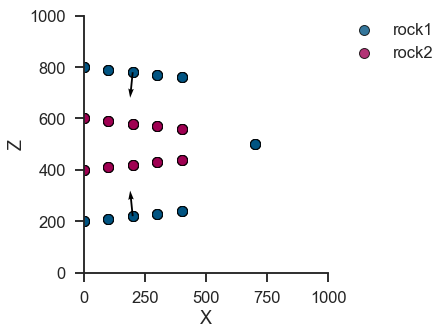

In [5]:
%matplotlib inline
gp.plot.plot_data(geo_data, direction='y')

Calculating the model:

In [6]:
interp_data = gp.set_interpolation_data(geo_data, theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!


In [7]:
geo_data.additional_data

values
Structure isLith                                         True
          isFault                                       False
          number faults                                     0
          number surfaces                                   2
          number series                                     1
          number surfaces per series                      [2]
          len surfaces surface_points                [55, 50]
          len series surface_points                     [105]
          len series orientations                         [2]
Options   dtype                                       float64
          output                                      geology
          theano_optimizer                       fast_compile
          device                                          cpu
          verbosity                                        []
Kriging   range                                       1732.05
          $C_o$                                       71428.6
          drift equations                                 [3]
          nugget grad                                    0.01
          nugget scalar                                 1e-06
Rescaling rescaling factor                              20000
          centers                      [350.0, 5000.0, 500.0]

In [8]:
sol = gp.compute_model(geo_data)

Displaying the result in x and y direction:

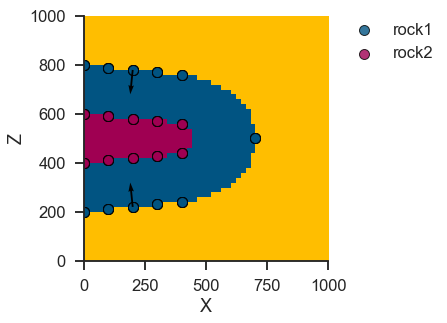

In [9]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=25,
                         direction='y', show_data=True)